In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [ ]:
data=pd.read_table('D:/collaborative_filtering/movielens/order/u.data', names=['uid','iid','r','ts'])
data.drop(['ts'],axis=1,inplace=True)

In [11]:
movies_title = pd.read_csv('D:/collaborative_filtering/movielens/order/item.txt', sep='\|', header=None)
movies_title=movies_title[[0,1]]
movies_title.columns = ['iid','title']

C:\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [12]:
data = pd.merge(data, movies_title, on='iid')

In [13]:
data.tail()

,uid,iid,r,title
99995,840,1674,4,Mamma Roma (1962)
99996,655,1640,3,"Eighth Day, The (1996)"
99997,655,1637,3,Girls Town (1996)
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,Dadetown (1995)


In [14]:
ratings_df = pd.DataFrame(data.groupby('title').mean()['r'])
ratings_df

,r
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns (1988),3.207921
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463


In [15]:
ratings_df['count'] = pd.DataFrame(data.groupby('title').count()['r'].sort_values(ascending=False))
ratings_df.sort_values(by='count', ascending=True, inplace=True)

In [16]:
most_count_top20 = ratings_df.tail(20)
most_count_top20

,r,count
title,,
Star Trek: First Contact (1996),3.660274,365
"Empire Strikes Back, The (1980)",4.204360,367
"Rock, The (1996)",3.693122,378
Chasing Amy (1997),3.839050,379
Jerry Maguire (1996),3.710938,384
"Silence of the Lambs, The (1991)",4.289744,390
Twelve Monkeys (1995),3.798469,392
Pulp Fiction (1994),4.060914,394
"Godfather, The (1972)",4.283293,413


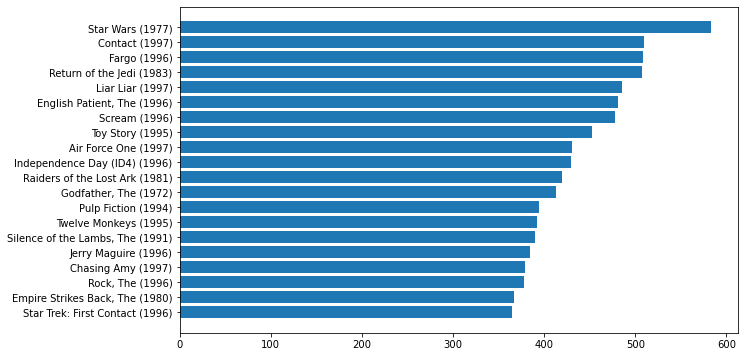

In [17]:
plt.figure(figsize=(10,6))
plt.barh(most_count_top20.index, most_count_top20['count'])
# plt.xlabel('No. of user ratings')
# plt.ylabel('The appearances for every rating')
# plt.title('Distribution of no. of ratings')
plt.show()

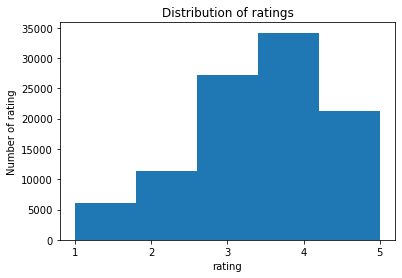

In [54]:
# Distribution of ratings
plt.hist(data['r'],bins=5)
plt.xticks(np.arange(1,6))
plt.xlabel('rating')
plt.ylabel('Number of rating')
plt.title('Distribution of ratings')
plt.show()


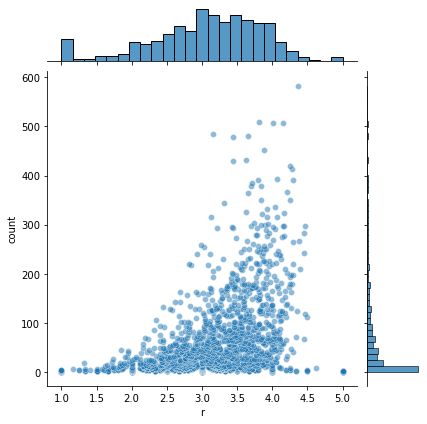

In [50]:
sns.jointplot(x = ratings_df['r'], y = ratings_df['count'], data = ratings_df, alpha = 0.5)

# 장르 분포 & release_date 변수로 year, month, day 별 분포 확인

In [20]:
movie_df = pd.read_csv('D:/collaborative_filtering/movielens/order/item.txt', sep='\|', encoding='latin-1',names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'action', 
                           'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 
                           'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western'])

In [21]:
movie_df

,movie_id,movie_title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,childrens,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


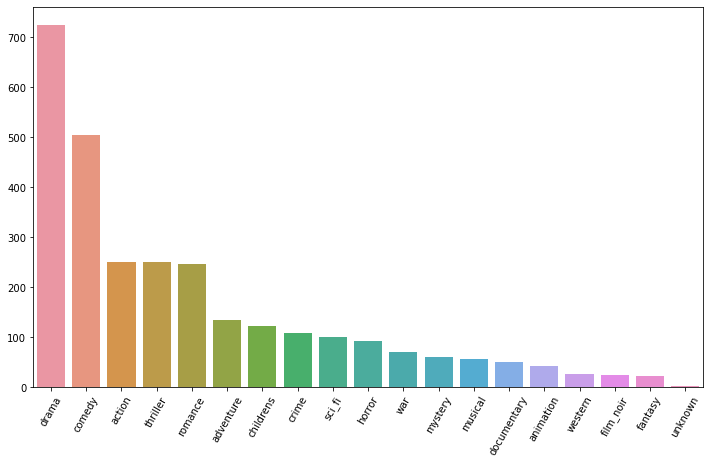

In [26]:
generes = ['unknown', 'action',
       'adventure', 'animation', 'childrens', 'comedy', 'crime', 'documentary',
       'drama', 'fantasy', 'film_noir', 'horror', 'musical', 'mystery',
       'romance', 'sci_fi', 'thriller', 'war', 'western']

plt.figure(figsize=(12,7))
genere_counts = movie_df.loc[:,generes].sum().sort_values(ascending=False)
sns.barplot(x=genere_counts.index, y=genere_counts.values)
plt.xticks(rotation=60);

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


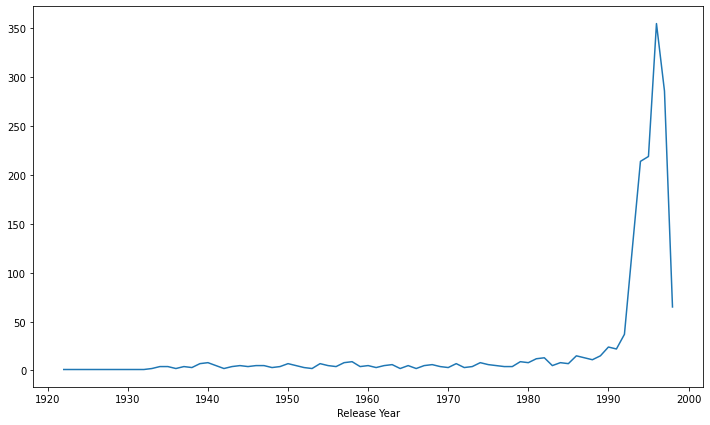

In [31]:
movie_df.release_date = pd.to_datetime(movie_df.release_date)
plt.figure(figsize=(12,7))
yearly_release_counts = movie_df.groupby(movie_df.release_date.dt.year).size().sort_values(ascending=False)
sns.lineplot(yearly_release_counts.index, yearly_release_counts.values);
plt.xlabel('Release Year');

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


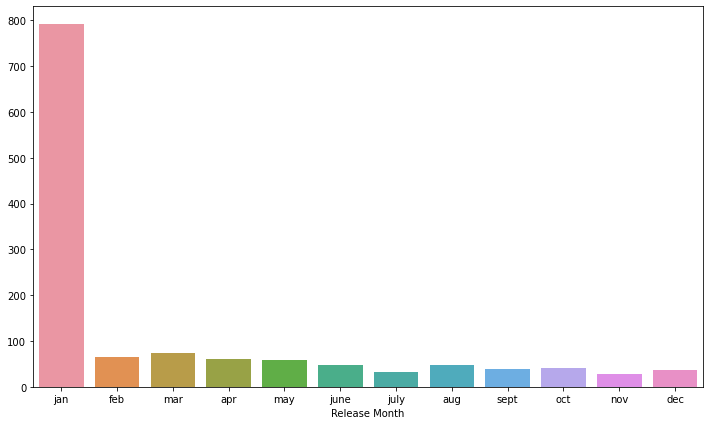

In [32]:
plt.figure(figsize=(12,7))
monthly_release_counts = movie_df[movie_df.release_date.dt.year > 1990].groupby(movie_df.release_date.dt.month).size()
sns.barplot(['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec'], monthly_release_counts.values);
plt.xlabel('Release Month');

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


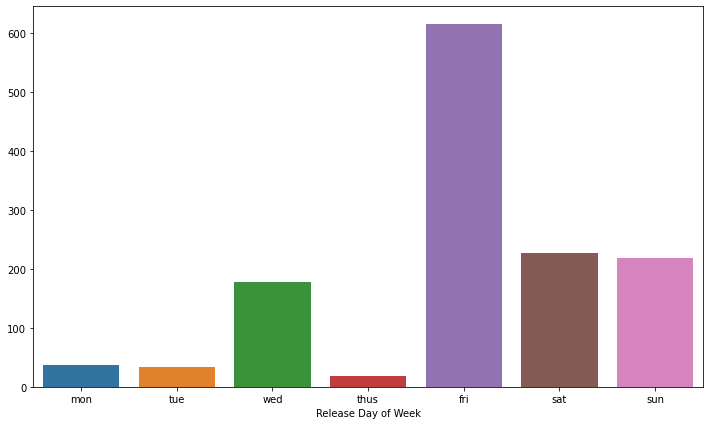

In [33]:
plt.figure(figsize=(12,7))
weekday_release_counts = movie_df[movie_df.release_date.dt.year > 1990].groupby(movie_df.release_date.dt.dayofweek).size()
sns.barplot(['mon', 'tue', 'wed', 'thus', 'fri', 'sat', 'sun'], weekday_release_counts.values);
plt.xlabel('Release Day of Week');